In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import itertools

In [59]:
test = pd.read_csv('/kaggle/input/test-dataset2/test_43.csv')

train = pd.read_csv('/kaggle/input/train-dataset2/train_43.csv')


train = train.drop_duplicates()
test = test.drop_duplicates()

train = train.reset_index()
test = test.reset_index()

pos_test = pd.DataFrame(test, columns=['x','y'])
label_test = pd.DataFrame(test, columns=["label"])

pos_train = pd.DataFrame(train, columns=['x','y'])
label_train = pd.DataFrame(train, columns=["label"])

data_test = pd.concat([pos_test, label_test], axis=1)
data_train = pd.concat([pos_train, label_train], axis=1)

In [60]:
def euclidean_dist(x1,y1,x2,y2): #Finding Distance between points
    dist = np.sqrt(np.sum((x1-x2)**2 + (y1-y2)**2))
    return dist

class KNN:

    def __init__(self, test, train, k):

        self.k= k
        self.test = test
        self.train = train
        self.x_test = test.loc[:,"x"]
        self.y_test = test.loc[:,"y"]
        self.pos_test = test[["x","y"]]
        self.label_test = test.loc[:,"label"]
        self.x_train = train.loc[:,"x"]
        self.y_train = train.loc[:,"y"]
        self.label_train = train.loc[:,"label"]
        self.pos_train = train[["x","y"]]

    def predict(self):
        correct_values=0

        for i in range(len(self.test)):
            self.test_array = np.empty((1,2)) # setting up an array of distance of the test point with train points and corresponding label of train point

            for j in range(len(self.train)):
                current_dist = euclidean_dist(self.x_test[i], self.y_test[i], self.x_train[j], self.y_train[j]) #Distance of test point from train points
                current_train_data = np.array([current_dist, self.label_train[j]]) #Distance of train points from test points and their labels
                self.test_array = np.vstack([current_train_data, self.test_array]) # Creating a vertical vector
            
            self.test_array = self.test_array[self.test_array[:, 0].argsort()] # sorting distances to find nearest neighbors
            
            label_freq = {0.0 : 0, 1.0 : 0, 2.0 : 0}
            for z in range(self.k): #Finding frequency of labels closer to test point
                idx = self.test_array[z][1]
                label_freq[round(idx)]+=1

            value = max(label_freq[0.0], label_freq[1.0], label_freq[2.0]) #Label of the test point
            if(self.label_test[i]==int(list(label_freq.keys())[list(label_freq.values()).index(value)])):
                correct_values+=1 #Correct Predictions

        accuracy = float(correct_values/(i+1))
        return accuracy
    
    def predict_label(self):
        
        predictions = []

        for i in range(len(self.test)):
            self.test_array = np.empty((1,2)) # setting up an array of distance of the test point with train points and corresponding label of train point

            for j in range(len(self.train)):
                current_dist = euclidean_dist(self.x_test[i], self.y_test[i], self.x_train[j], self.y_train[j]) #Distance of test point from train points
                current_train_data = np.array([current_dist, self.label_train[j]]) #Distance of train points from test points and their labels
                self.test_array = np.vstack([current_train_data, self.test_array]) # Creating a vertical vector
            
            self.test_array = self.test_array[self.test_array[:, 0].argsort()] # sorting distances to find nearest neighbors
            
            label_freq = {0.0 : 0, 1.0 : 0, 2.0 : 0}
            for z in range(self.k): #Finding frequency of labels closer to test point
                idx = self.test_array[z][1]
                label_freq[round(idx)]+=1

            value = max(label_freq[0.0], label_freq[1.0], label_freq[2.0]) #Label of the test point
            
            if value == label_freq[0.0]:
                label = 0
            elif value == label_freq[1.0]:
                label = 1
            else:
                label = 2
                
            predictions.append([label])

        predictions_df = pd.DataFrame(predictions, columns = ["label"])
        return predictions_df

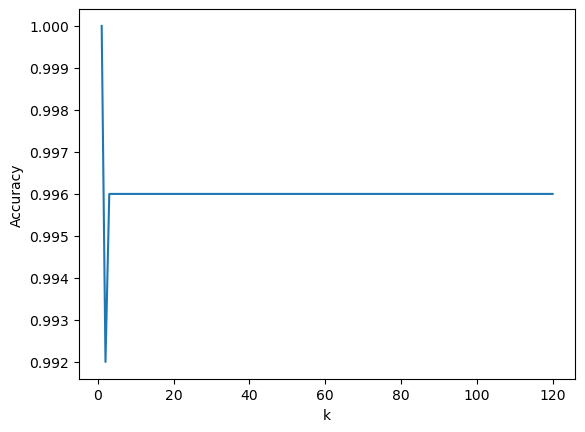

In [61]:
accuracy = []
index = []

for k in [1,2,3,5,7,9,15,28,56,84,120]:
    prediction_train = KNN(train, train, k)
    accuracy.append([prediction_train.predict()])
    index.append([k])
    
plt.plot(index, accuracy)

plt.xlabel("k")
plt.ylabel("Accuracy")

plt.show()

In [62]:
prediction_test_1 = KNN(test, train, k=1)
print(f"Accuracy for test data with best model is : {prediction_test_1.predict()*100}% where k = 1.")
prediction_train_1 = KNN(train, train, k=1)
print(f"Accuracy for train data with best model is : {prediction_train_1.predict()*100}% where k = 1.")

Accuracy for test data with best model is : 98.0% where k = 1.
Accuracy for train data with best model is : 100.0% where k = 1.


The following is the scatterplot for training data:


<AxesSubplot:xlabel='x', ylabel='y'>

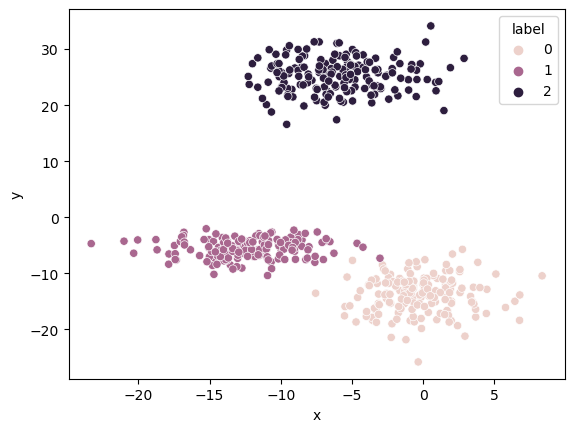

In [63]:
print("The following is the scatterplot for training data:")

sns.scatterplot(x="x", y="y", hue='label', data=data_train)

In [64]:
min_x, max_x = pos_test.iloc[:, 0].min()-1, pos_test.iloc[:, 0].max()+1
min_y, max_y = pos_test.iloc[:, 1].min()-1, pos_test.iloc[:, 1].max()+1

#creating a grid to draw a decision boundary

xgrid = np.arange(min_x, max_x, 0.3)
ygrid = np.arange(min_y, max_y, 0.3)

# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x,y input for the model

grid = np.hstack((r1,r2))


class knn_boundary:

    def __init__(self, test, train, k):

        self.k= k
        self.test = test
        self.train = train
        self.x_train = train.loc[:,"x"]
        self.y_train = train.loc[:,"y"]
        self.label_train = train.loc[:,"label"]
        self.pos_train = train.loc[:,["x","y"]]

    def predict(self):
        
        predictions = []

        for i in range(len(self.test)):
            self.test_array = np.empty((1,2)) # setting up an array of distance of the test point with train points and corresponding label of train point

            for j in range(len(self.train)):
                current_dist = euclidean_dist(self.test[i][0], self.test[i][1], self.x_train[j], self.y_train[j]) #Distance of test point from train points
                current_train_data = np.array([current_dist, self.label_train[j]]) #Distance of train points from test points and their labels
                self.test_array = np.vstack([current_train_data, self.test_array]) # Creating a vertical vector
            
            self.test_array = self.test_array[self.test_array[:, 0].argsort()] # sorting distances to find nearest neighbors
            
            label_freq = {0.0 : 0, 1.0 : 0, 2.0 : 0}
            for z in range(self.k): #Finding frequency of labels closer to test point
                idx = self.test_array[z][1]
                label_freq[round(idx)]+=1

            value = max(label_freq[0.0], label_freq[1.0], label_freq[2.0]) #Label of the test point
            
            if value == label_freq[0.0]:
                label = "predicted_0"
            elif value == label_freq[1.0]:
                label = "predicted_1"
            else:
                label = "predicted_2"
                
            predictions.append([self.test[i][0], self.test[i][1], label])

        predictions_df = pd.DataFrame(predictions, columns = ["x", "y", "label"])
        return predictions_df

#predicting label for all points on 2d

model = knn_boundary(grid, train, k=1)
boundary = model.predict()

The following is the decision boundary and test data for k = 1:


<AxesSubplot:xlabel='x', ylabel='y'>

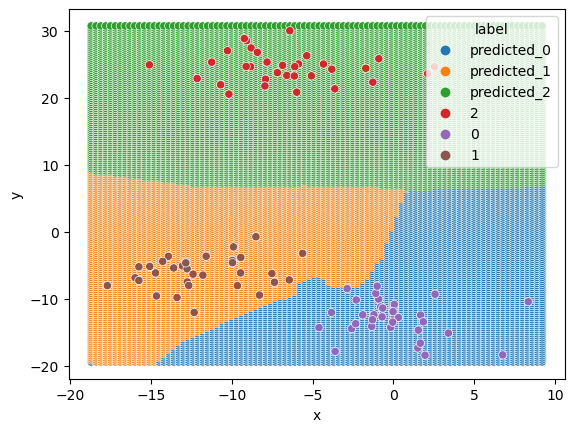

In [65]:
data = boundary.append(test, ignore_index=True)

print("The following is the decision boundary and test data for k = 1:")

sns.scatterplot(x="x", y="y", hue='label', data=data)

In [66]:
knn_prediction = KNN(train, train, k=1)
knn_prediction_accuracy = knn_prediction.predict()
predicted_labels = knn_prediction.predict_label()

predicted_train = predicted_labels
actual_train = label_train

knn_prediction = KNN(test, train, k=1)
knn_prediction_accuracy = knn_prediction.predict()
predicted_labels = knn_prediction.predict_label()

predicted_test = predicted_labels
actual_test = label_test

In [67]:
def confusion_matrix(actual, predicted):
    
    # extract the different classes
    no_classes = np.unique(actual)

    # initialize the confusion matrix
    confusion_matx = np.zeros((len(no_classes)+1, len(no_classes)+1))

    for a in range(len(actual)):
        confusion_matx[actual.iloc[a], predicted.iloc[a]] +=1
    
    return confusion_matx


# Updating the function we made above

def plot_confusion_matrix(actual , predicted , classes = None , text_size = 10, figsize = (9 , 9)):

    # Setting the default figsize 
    
    figsize = figsize
    
    # Create the confusion matrix
    
    cm = confusion_matrix(actual, predicted)
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[i,len(cm[0])-1] += cm[i,j]
            
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[len(cm[0])-1,i] += cm[j,i]
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm[len(cm[0])-1,len(cm[0])-1] += cm[i,j]
    
    cm_norm = cm.astype('float') / len(actual)
    
    cm_norm[len(cm[0])-1,len(cm[0])-1] = 0
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm_norm[i,len(cm[0])-1] = cm[i,i]/cm[i,len(cm[0])-1]
    
    for i in range(len(cm[0])-1):
        for j in range(len(cm[0])-1):
            cm_norm[len(cm[0])-1,j] = cm[j,j]/cm[len(cm[0])-1,j]
    
    for i in range(len(cm[0])-1):
        cm_norm[len(cm[0])-1,len(cm[0])-1] += cm[i,i]/len(actual)
    
    # Number of clases
    
    no_class = cm.shape[0]

    # Making our plot
    
    figure , conf_plt = plt.subplots(figsize = figsize)
    
    # Drawing the matrix plot 
    
    dr_conf = conf_plt.matshow(cm , cmap = plt.cm.Blues)
    figure.colorbar(dr_conf)

    # Setting labels
    
    if classes:
        labels = classes
    else:
        labels = [0, 1, 2,""]

    # Labeling axes
    
    conf_plt.set(title ='Confusion Matrix' , 
        xlabel = 'Predicted Label' , 
        ylabel = 'Actual Label' , 
        xticks = np.arange(no_class) , 
        yticks = np.arange(no_class) , 
        xticklabels = labels , 
        yticklabels = labels
        )
    
    # Setting the x axis labels
    
    conf_plt.xaxis.set_label_position('bottom')
    conf_plt.xaxis.tick_bottom()

    # Adjusting the size of labels
    conf_plt.title.set_size(text_size)
    conf_plt.xaxis.label.set_size(text_size)
    conf_plt.yaxis.label.set_size(text_size)

    # Setting threshold for colors 

    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text
    
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j , i , f'{cm[i , j]} \n({cm_norm[i , j]*100:.1f}%)' , 
            horizontalalignment = 'center' , 
            color = 'white' if cm[i , j] > threshold else 'black' , 
                size = text_size)
        

The following is the confusion matrix for Training Data for k=1:


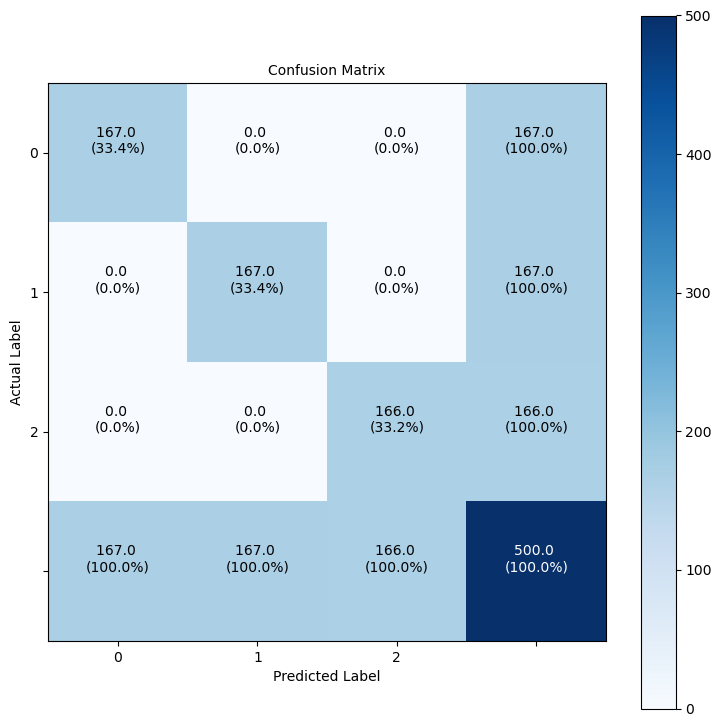

In [68]:
np.seterr(divide='ignore', invalid='ignore')

print("The following is the confusion matrix for Training Data for k=1:")
plot_confusion_matrix(actual_train, predicted_train)

The following is the confusion matrix for Testing Data for k=1:


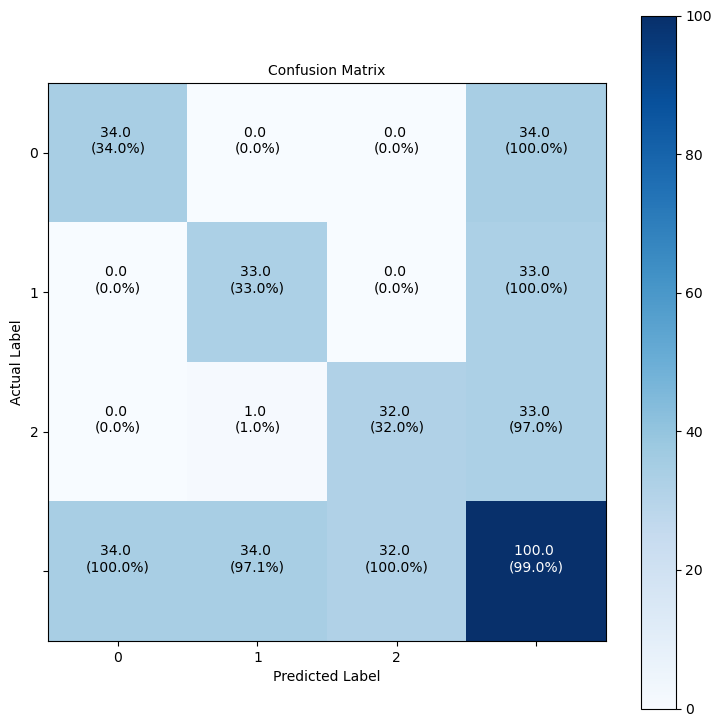

In [69]:
print("The following is the confusion matrix for Testing Data for k=1:")
plot_confusion_matrix(actual_test, predicted_test)